In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#import dataset
mydata = pd.read_csv('E:\DataScientist\DataScientist.csv')

In [21]:
#data exploration
#the first 5 rows
mydata.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [22]:
#data exploration to see the number of columns and rows
mydata.shape

(3909, 17)

In [23]:
#explore the dataset. view the unique values
mydata.nunique()

Unnamed: 0           3909
index                3909
Job Title            2079
Salary Estimate       148
Job Description      3685
Rating                 37
Company Name         2075
Location              191
Headquarters          543
Size                    9
Founded               173
Type of ownership      15
Industry               96
Sector                 26
Revenue                14
Competitors           422
Easy Apply              2
dtype: int64

In [25]:
#From above we can evaluate by visual examination features that
#are not going to be useful in data analysis
#and drop these features
c_mydata = mydata[['Job Title', 'Salary Estimate', 'Company Name', 'Industry']]

In [43]:
#data preprocessing to check for NA values
c_mydata.isna().sum()

JobTitle          0
SalaryEstimate    0
CompanyName       0
Industry          0
dtype: int64

In [32]:
#remane the columns
c_mydata = c_mydata.rename(columns = {'Job Title':'JobTitle', 'Salary Estimate':'SalaryEstimate', 'Company Name':'CompanyName',
                        })

In [33]:
c_mydata.head()

,JobTitle,SalaryEstimate,CompanyName,Industry
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),Hopper\n3.5,Travel Agencies
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),Noom US\n4.5,"Health, Beauty, & Fitness"
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M,-1
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital\n3.4,Internet
4,"Director, Data Science",$111K-$181K (Glassdoor est.),United Entertainment Group\n3.4,Advertising & Marketing


In [41]:
#replace -1 in the data frame with NaN
df=c_mydata.replace(['-1'],np.nan)

In [42]:
df.head()

,JobTitle,SalaryEstimate,CompanyName,Industry
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),Hopper\n3.5,Travel Agencies
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),Noom US\n4.5,"Health, Beauty, & Fitness"
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M,NaN
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital\n3.4,Internet
4,"Director, Data Science",$111K-$181K (Glassdoor est.),United Entertainment Group\n3.4,Advertising & Marketing


In [77]:
#Perform data cleaning in Salary Estimate, Company name
df['Salary']=df['SalaryEstimate'].apply(lambda x:x.split()[0])
df['Salary']=df['SalaryEstimate'].apply(lambda x:x.replace('$',''))
df['Salary']=df['SalaryEstimate'].apply(lambda x:x.replace('K',''))
df['Salary']=df['Salary'].apply(lambda x:x.split()[0])
df['Company']=df['CompanyName'].apply(lambda x:x.split()[0])

In [92]:
df.head()

,JobTitle,SalaryEstimate,CompanyName,Industry,Salary,Company,Salary1
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),Hopper\n3.5,Travel Agencies,$111-$181,Hopper,$111-$181
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),Noom US\n4.5,"Health, Beauty, & Fitness",$111-$181,Noom,$111-$181
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M,NaN,$111-$181,Decode_M,$111-$181
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital\n3.4,Internet,$111-$181,Sapphire,$111-$181
4,"Director, Data Science",$111K-$181K (Glassdoor est.),United Entertainment Group\n3.4,Advertising & Marketing,$111-$181,United,$111-$181


In [97]:
#drop the old columns
df = df.drop(['Salary1', 'SalaryEstimate', 'CompanyName'], axis = 'columns')

In [105]:
#explore the cleaned data frame
df.head()

,JobTitle,Industry,Salary,Company
0,Senior Data Scientist,Travel Agencies,$111-$181,Hopper
1,"Data Scientist, Product Analytics","Health, Beauty, & Fitness",$111-$181,Noom
2,Data Science Manager,none,$111-$181,Decode_M
3,Data Analyst,Internet,$111-$181,Sapphire
4,"Director, Data Science",Advertising & Marketing,$111-$181,United


In [99]:
#Check for missing values in the dataset

df.isna().sum()

JobTitle      0
Industry    546
Salary        0
Company       0
dtype: int64

In [116]:
#handle the missing values in the Industry field
#the company field does not have missing value, this imples that the specific inductry 
#in the company with NaN values can be replaced with none
df['Industry'] = df['Industry'].fillna('none')

In [117]:
#verify no missing values
df.isna().sum()

JobTitle    0
Industry    0
Salary      0
Company     0
dtype: int64

In [118]:
df.head()

,JobTitle,Industry,Salary,Company
0,Senior Data Scientist,Travel Agencies,$111-$181,Hopper
1,"Data Scientist, Product Analytics","Health, Beauty, & Fitness",$111-$181,Noom
2,Data Science Manager,none,$111-$181,Decode_M
3,Data Analyst,Internet,$111-$181,Sapphire
4,"Director, Data Science",Advertising & Marketing,$111-$181,United


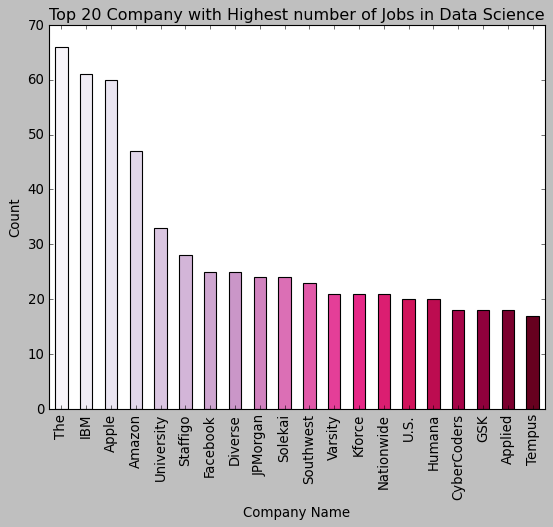

In [163]:
#now we start to visualize the data
plt.rcParams["figure.figsize"] = (10,8)
plt.style.use("classic")
color = plt.cm.PuRd(np.linspace(0,1,20))
df["Company"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Company with Highest number of Jobs in Data Science")
plt.xlabel("Company Name")
plt.ylabel("Count")
plt.show()

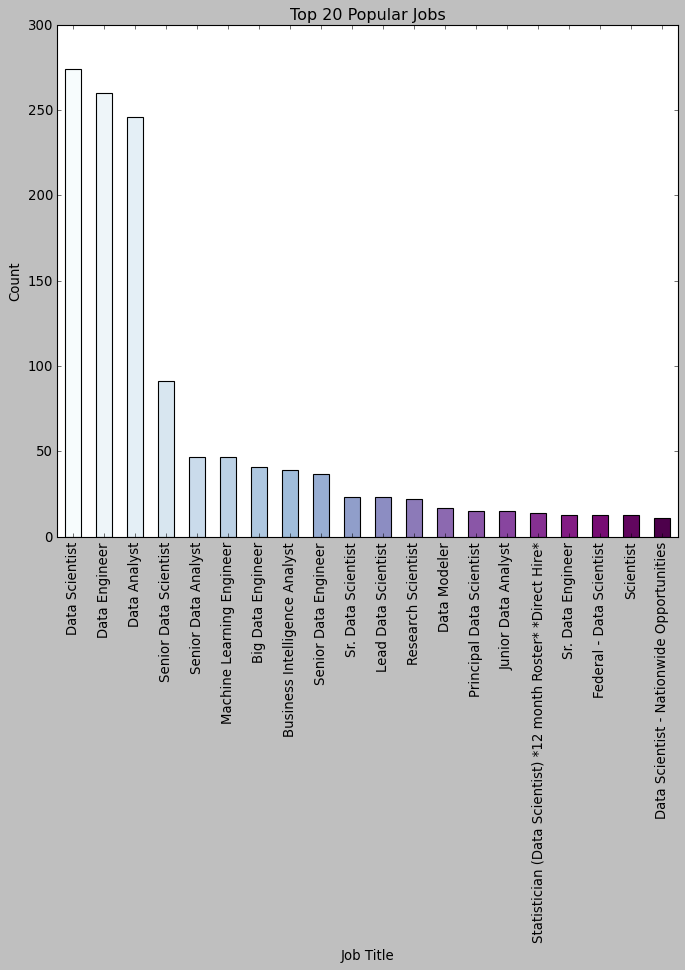

In [178]:
plt.rcParams['figure.figsize'] = (10,8)
color = plt.cm.BuPu(np.linspace(0,1,20))
df["JobTitle"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Popular Jobs")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()

In [179]:
#check the salary paid by each company
#check the salary paid by each jobtitle
#check the salary field
df.head()

,JobTitle,Industry,Salary,Company
0,Senior Data Scientist,Travel Agencies,$111-$181,Hopper
1,"Data Scientist, Product Analytics","Health, Beauty, & Fitness",$111-$181,Noom
2,Data Science Manager,none,$111-$181,Decode_M
3,Data Analyst,Internet,$111-$181,Sapphire
4,"Director, Data Science",Advertising & Marketing,$111-$181,United


In [250]:
df = pd.read_csv("E:\my_data.csv")
df.head()

,JobTitle,Industry,Salary,Company,Salary_lower_bound,Salary_upper_bound
0,Senior Data Scientist,Travel Agencies,$111-$181,Hopper,111.0,181.0
1,"Data Scientist, Product Analytics","Health, Beauty, & Fitness",$111-$181,Noom,111.0,181.0
2,Data Science Manager,none,$111-$181,Decode_M,111.0,181.0
3,Data Analyst,Internet,$111-$181,Sapphire,111.0,181.0
4,"Director, Data Science",Advertising & Marketing,$111-$181,United,111.0,181.0


In [251]:
#split the salary in salary_upper-limit and salary_lower limit, then get the average salary
hours_per_week = 40
weeks_per_year = 52

for i in range(df.shape[0]):
    Salary = df.loc[i,"Salary"]
    Salary = Salary.replace("$", "")
    
    if "Per Hour" in Salary:
        lower, upper = Salary.split("-")
        upper, _ = upper.split("Per")
        upper= upper.strip()
        upper, _= upper.split("(", "Employer")
        lower = int(lower) *hours_per_week*weeks_per_year*(1/1000)
        upper = int(upper) *hours_per_week*weeks_per_year*(1/1000)
        
    else:
        lower, upper = Salary.split("-")
        lower = lower.replace("K", "")
        #upper, _= upper.split("(")
        upper=upper.replace("K", "")
        upper = upper.strip()
    
        
    lower = int(lower)
    upper = int(upper)
    df.loc[i,"Salary_lower_bound"] = lower
    df.loc[i,"Salary_upper_bound"] = upper

In [252]:
df.head()

,JobTitle,Industry,Salary,Company,Salary_lower_bound,Salary_upper_bound
0,Senior Data Scientist,Travel Agencies,$111-$181,Hopper,111.0,181.0
1,"Data Scientist, Product Analytics","Health, Beauty, & Fitness",$111-$181,Noom,111.0,181.0
2,Data Science Manager,none,$111-$181,Decode_M,111.0,181.0
3,Data Analyst,Internet,$111-$181,Sapphire,111.0,181.0
4,"Director, Data Science",Advertising & Marketing,$111-$181,United,111.0,181.0


In [253]:
df.drop(["Salary"],axis=1,inplace=True)
df.head()

,JobTitle,Industry,Company,Salary_lower_bound,Salary_upper_bound
0,Senior Data Scientist,Travel Agencies,Hopper,111.0,181.0
1,"Data Scientist, Product Analytics","Health, Beauty, & Fitness",Noom,111.0,181.0
2,Data Science Manager,none,Decode_M,111.0,181.0
3,Data Analyst,Internet,Sapphire,111.0,181.0
4,"Director, Data Science",Advertising & Marketing,United,111.0,181.0


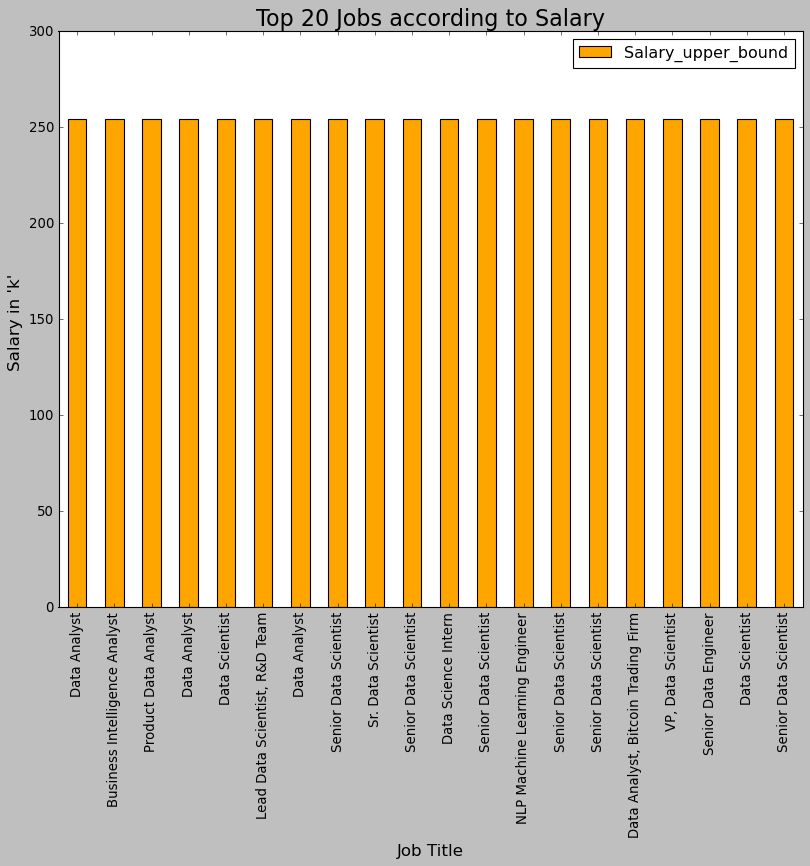

In [277]:
#Plot the top paying jobs
plt.rcParams['figure.figsize'] = (12,9)
m = df['Salary_upper_bound'].max()
df[['JobTitle','Salary_upper_bound']].nlargest(20,"Salary_upper_bound").plot.bar(x="JobTitle",y="Salary_upper_bound",color='orange')
plt.title("Top 20 Jobs according to Salary",fontsize=20)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Salary in 'k' ",fontsize=15)
plt.show()

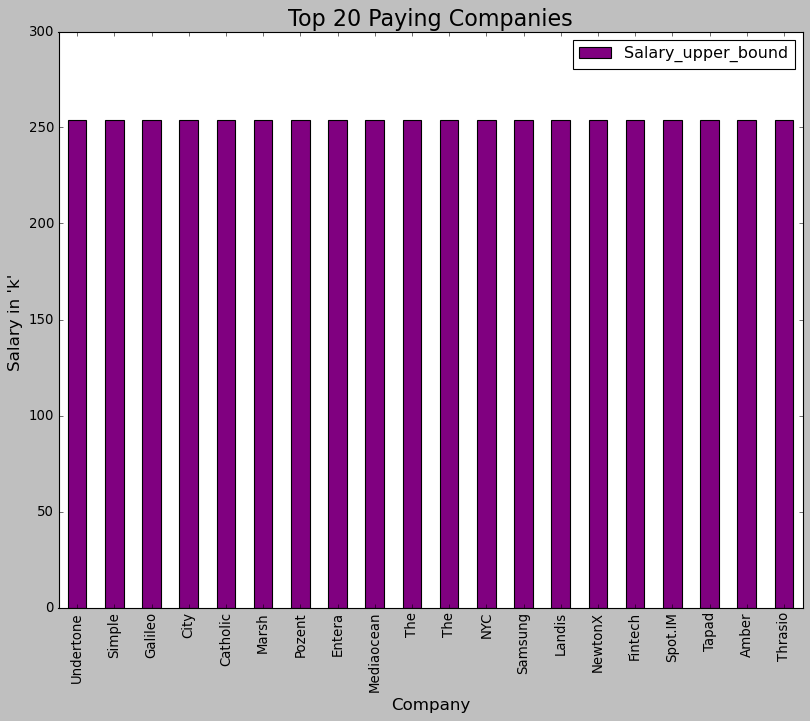

In [276]:
#Plot the top paying companies
plt.rcParams['figure.figsize'] = (12,9)
m = df['Salary_upper_bound'].max()
df[['Company','Salary_upper_bound']].nlargest(20,"Salary_upper_bound").plot.bar(x="Company",y="Salary_upper_bound",color='purple')
plt.title("Top 20 Paying Companies",fontsize=20)
plt.xlabel("Company",fontsize=15)
plt.ylabel("Salary in 'k' ",fontsize=15)
plt.show()